In [2]:
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [3]:
alandur_daily_aqi = pd.read_csv("../data/AQIData/alandur_daily_aqi.csv")

In [4]:


# Assuming alandur_daily_aqi is your original DataFrame
# First, set the index to the 'Timestamp' column
alandur_daily_aqi_indexed = alandur_daily_aqi.set_index('Timestamp')

# Make sure the index is datetime
alandur_daily_aqi_indexed.index = pd.to_datetime(alandur_daily_aqi_indexed.index)

# Now, keep only the 'AQI' column
alandur_daily_aqi_filtered = alandur_daily_aqi_indexed[['AQI']]

# Now you can split the data
train_data = alandur_daily_aqi_filtered.loc[:'2023-11-23']
test_data = alandur_daily_aqi_filtered.loc['2023-11-24':'2023-12-01']




In [5]:
train_data

,AQI
Timestamp,
2021-01-01,179.353333
2021-01-02,179.353333
2021-01-03,179.353333
2021-01-04,179.353333
2021-01-05,179.353333
...,...
2023-11-19,146.662029
2023-11-20,112.495552
2023-11-21,142.987548


In [6]:
test_data

,AQI
Timestamp,
2023-11-24,147.364041
2023-11-25,137.439074
2023-11-26,170.606080
2023-11-27,118.337449
2023-11-28,106.437528
2023-11-29,159.221580
2023-11-30,134.622626
2023-12-01,159.685120


In [7]:
import pandas as pd
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA

# Assuming alandur_daily_aqi_filtered is already defined and contains only 'AQI' with 'Timestamp' as index
train_end = pd.Timestamp('2023-11-23')
test_end = pd.Timestamp('2023-12-01')

# Ensure you are using the filtered DataFrame with only 'AQI'
train_data = alandur_daily_aqi_filtered[:train_end]['AQI']
test_data = alandur_daily_aqi_filtered[train_end + pd.Timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 1)
rolling_predictions = test_data.copy()

# Loop through the test data index for rolling predictions
for current_test_date in test_data.index:
    print("Current test date:", current_test_date)
    
    # Create the training data up to the day before the current test day
    train_data = alandur_daily_aqi_filtered[:current_test_date - pd.Timedelta(days=1)]['AQI']
    
    # Fit the ARIMA model
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    
    # Forecast the next value
    pred = model_fit.forecast(steps=1)  # Forecasting one step ahead
    print("Predicted value:", pred[0])
    
    # Store the prediction in the rolling_predictions Series
    rolling_predictions[current_test_date] = pred[0]  # Store the predicted value

# Display the rolling predictions
print("\nRolling Predictions:")
print(rolling_predictions)

Current test date: 2023-11-24 00:00:00


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/tmp/ipykernel_8505/3202216654.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_8505/3202216654.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informa

Predicted value: 144.80900603255094
Current test date: 2023-11-25 00:00:00
Predicted value: 143.87732319208214
Current test date: 2023-11-26 00:00:00


/tmp/ipykernel_8505/3202216654.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_8505/3202216654.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informa

Predicted value: 137.99319078476563
Current test date: 2023-11-27 00:00:00
Predicted value: 155.0171825766276
Current test date: 2023-11-28 00:00:00


/tmp/ipykernel_8505/3202216654.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_8505/3202216654.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informa

Predicted value: 130.50941014187842
Current test date: 2023-11-29 00:00:00
Predicted value: 116.54068511021714
Current test date: 2023-11-30 00:00:00
Predicted value: 142.23175067421477
Current test date: 2023-12-01 00:00:00
Predicted value: 135.9419571361119

Rolling Predictions:
Timestamp
2023-11-24    144.809006
2023-11-25    143.877323
2023-11-26    137.993191
2023-11-27    155.017183
2023-11-28    130.509410
2023-11-29    116.540685
2023-11-30    142.231751
2023-12-01    135.941957
Name: AQI, dtype: float64


/tmp/ipykernel_8505/3202216654.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_8505/3202216654.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informa

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

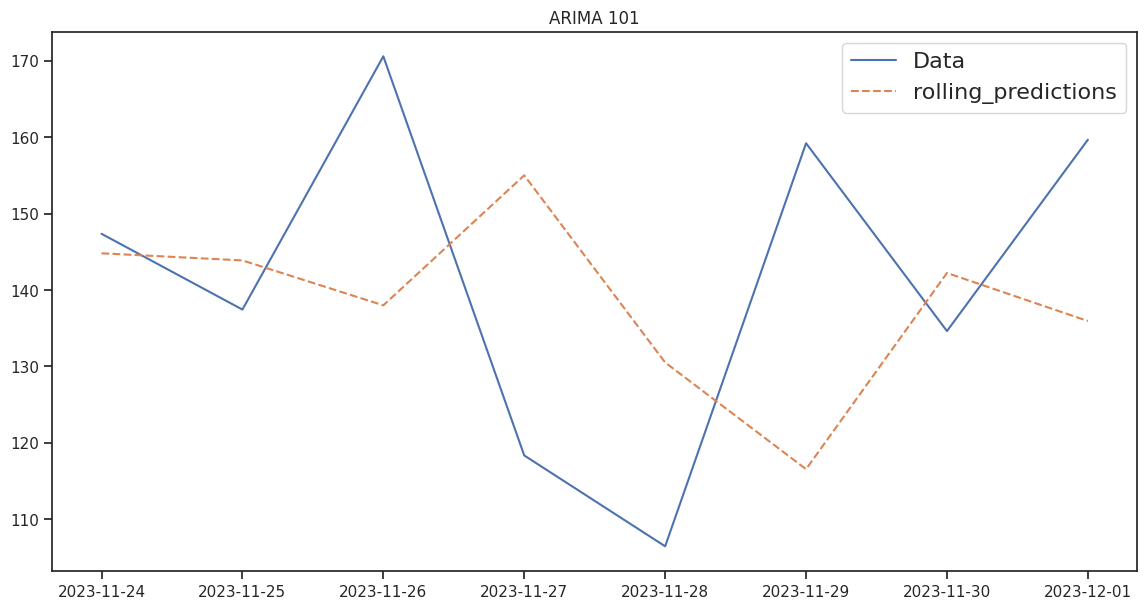

In [8]:
p, d, q = 1, 0, 1 
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 101')

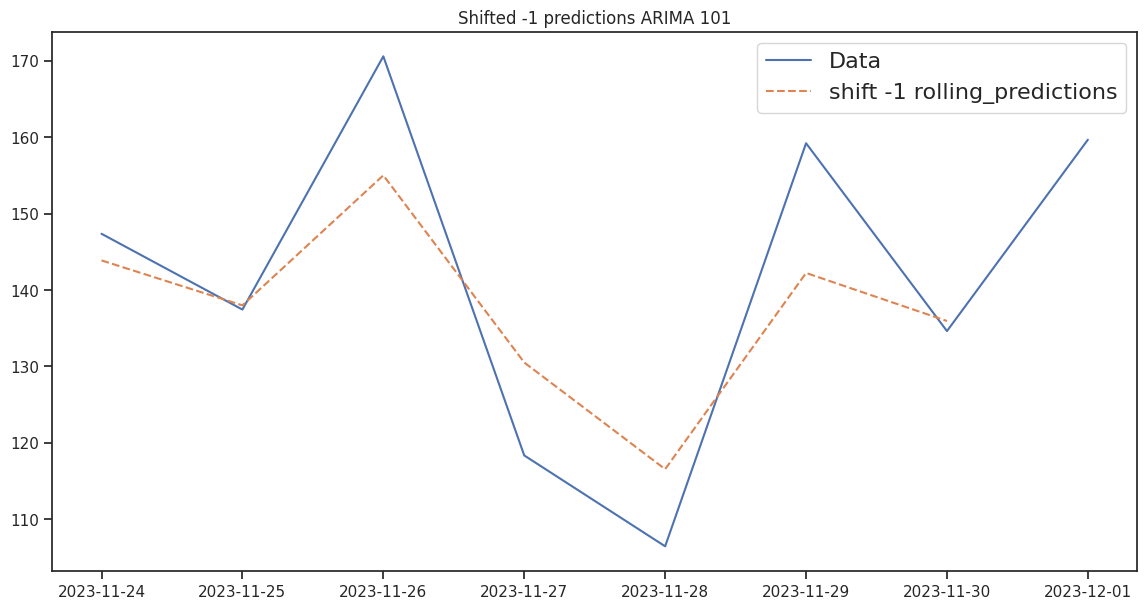

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [10]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = alandur_daily_aqi_filtered[:train_end]['AQI']
test_data = alandur_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 0)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = alandur_daily_aqi_filtered[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information

pred 2023-10-24    188.717476
Freq: D, dtype: float64
pred 2023-10-25    232.151981
Freq: D, dtype: float64


/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-10-26    189.680404
Freq: D, dtype: float64
pred 2023-10-27    166.235534
Freq: D, dtype: float64
pred 2023-10-28    189.921237
Freq: D, dtype: float64
pred 2023-10-29    209.295097
Freq: D, dtype: float64


/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-10-30    210.081253
Freq: D, dtype: float64
pred 2023-10-31    191.130741
Freq: D, dtype: float64
pred 2023-11-01    222.552714
Freq: D, dtype: float64
pred 2023-11-02    232.890773
Freq: D, dtype: float64
pred 2023-11-03    215.716504
Freq: D, dtype: float64


/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-04    226.778021
Freq: D, dtype: float64
pred 2023-11-05    198.696382
Freq: D, dtype: float64
pred 2023-11-06    86.3095
Freq: D, dtype: float64
pred 2023-11-07    107.013548
Freq: D, dtype: float64
pred 2023-11-08    194.29594
Freq: D, dtype: float64


/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-09    129.487296
Freq: D, dtype: float64
pred 2023-11-10    140.260951
Freq: D, dtype: float64
pred 2023-11-11    148.465944
Freq: D, dtype: float64
pred 2023-11-12    134.739535
Freq: D, dtype: float64
pred 2023-11-13    235.415225
Freq: D, dtype: float64
pred 2023-11-14    167.127571
Freq: D, dtype: float64


/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-15    112.89096
Freq: D, dtype: float64
pred 2023-11-16    143.317482
Freq: D, dtype: float64
pred 2023-11-17    193.723514
Freq: D, dtype: float64
pred 2023-11-18    135.35392
Freq: D, dtype: float64
pred 2023-11-19    153.071479
Freq: D, dtype: float64
pred 2023-11-20    141.648018
Freq: D, dtype: float64
pred 2023-11-21    116.60057
Freq: D, dtype: float64
pred 2023-11-22    138.951764
Freq: D, dtype: float64


/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/3930250737.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 100')

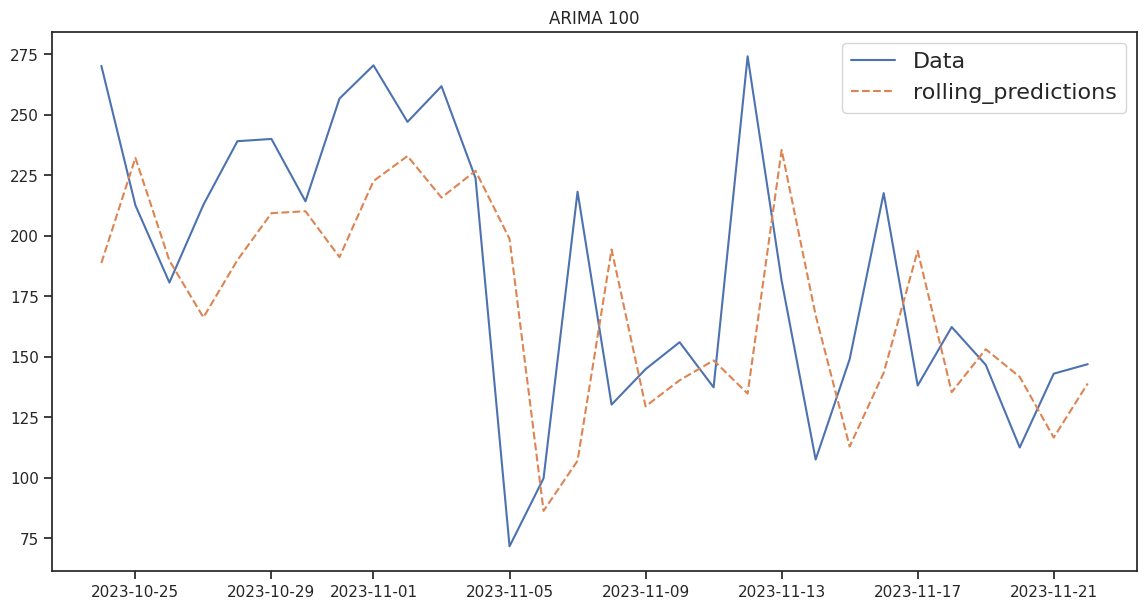

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 100')

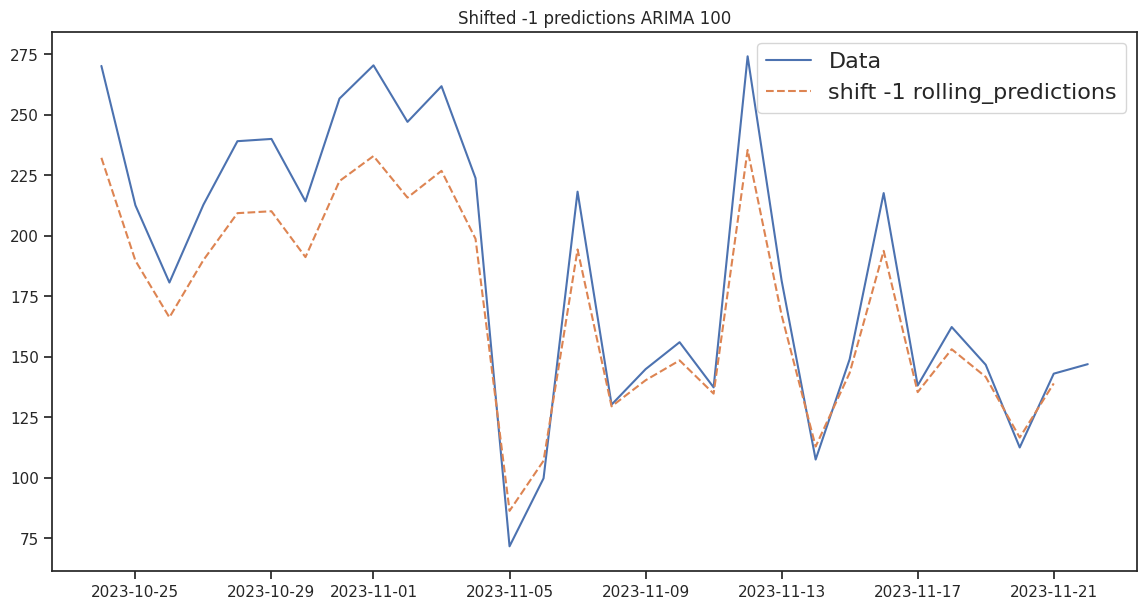

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [13]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = alandur_daily_aqi_filtered[:train_end]['AQI']
test_data = alandur_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

my_order = (0, 0, 1)
p,d,q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = alandur_daily_aqi_filtered[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information

pred 2023-10-24    166.022661
Freq: D, dtype: float64
pred 2023-10-25    183.921286
Freq: D, dtype: float64


pred 2023-10-26    142.264084
Freq: D, dtype: float64
pred 2023-10-27    147.731059
Freq: D, dtype: float64
pred 2023-10-28    162.597119
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-10-29    169.030347
Freq: D, dtype: float64
pred 2023-10-30    166.124388
Freq: D, dtype: float64
pred 2023-10-31    153.538738
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-01    184.262251
Freq: D, dtype: float64
pred 2023-11-02    174.992284
Freq: D, dtype: float64
pred 2023-11-03    167.330986
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-04    179.973695
Freq: D, dtype: float64
pred 2023-11-05    151.878766
Freq: D, dtype: float64
pred 2023-11-06    82.716689
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-07    136.90417
Freq: D, dtype: float64
pred 2023-11-08    172.822593
Freq: D, dtype: float64
pred 2023-11-09    103.727232
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-10    150.419333
Freq: D, dtype: float64
pred 2023-11-11    130.631762
Freq: D, dtype: float64
pred 2023-11-12    131.276125
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-13    207.347223
Freq: D, dtype: float64
pred 2023-11-14    113.267662
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-15    124.517723
Freq: D, dtype: float64
pred 2023-11-16    141.374401
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-17    170.325516
Freq: D, dtype: float64
pred 2023-11-18    109.873422
Freq: D, dtype: float64
pred 2023-11-19    157.016666
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-20    122.118353
Freq: D, dtype: float64
pred 2023-11-21    122.516085
Freq: D, dtype: float64
pred 2023-11-22    139.284611
Freq: D, dtype: float64


/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_8505/1164901141.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 001')

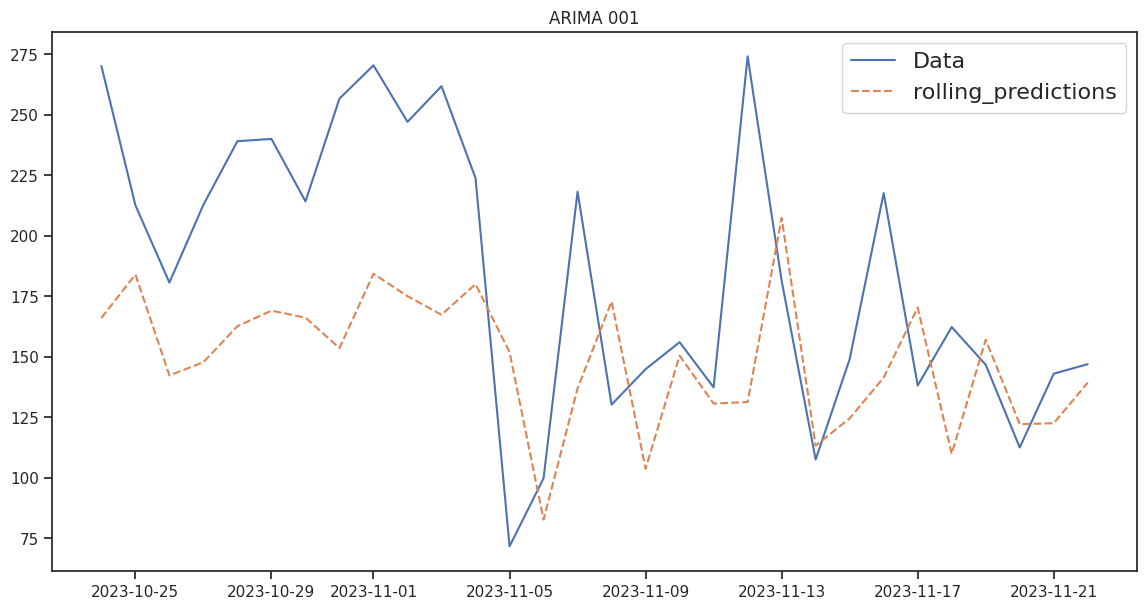

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 001')

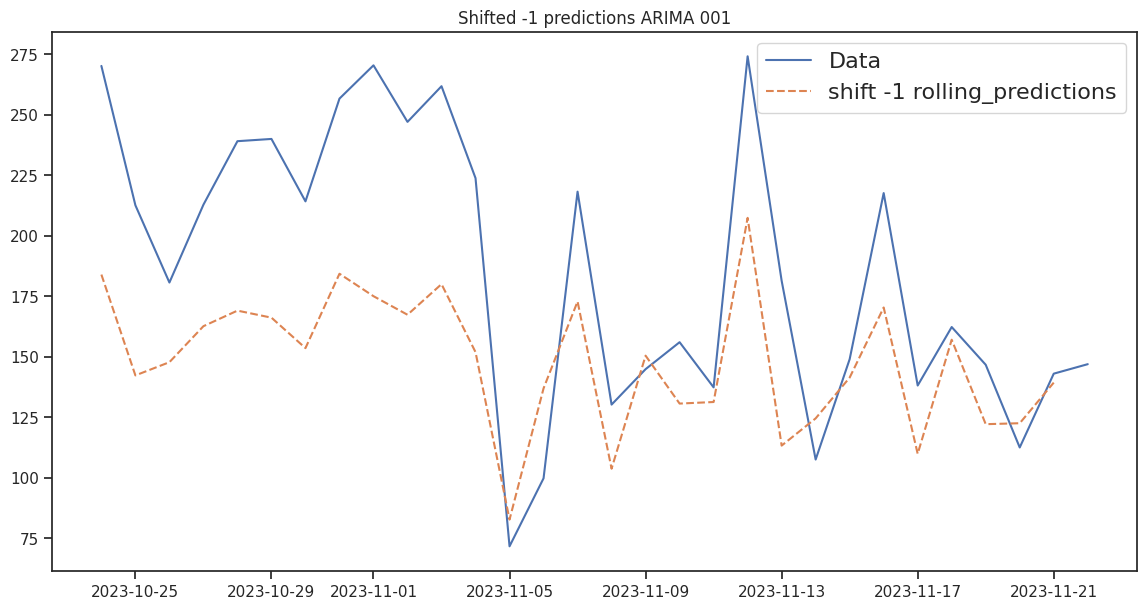

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [16]:
train_end = datetime(2023, 11, 18) # 4 days
test_end = datetime(2023, 11, 22)

train_data = alandur_daily_aqi_filtered[:train_end]['AQI']
test_data = alandur_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 0, 1)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1052
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5561.345
Date:                Wed, 26 Feb 2025   AIC                          11130.689
Time:                        11:30:49   BIC                          11150.523
Sample:                    01-01-2021   HQIC                         11138.209
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.8746     11.323     11.293      0.000     105.682     150.067
ar.L1          0.8592      0.020     43.641      0.000       0.821       0.898
ma.L1         -0.2939      0.020    -

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [17]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [18]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions
residuals

Timestamp
2023-11-19    -7.061931
2023-11-20   -37.588420
2023-11-21    -3.969002
2023-11-22     2.640835
dtype: float64

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

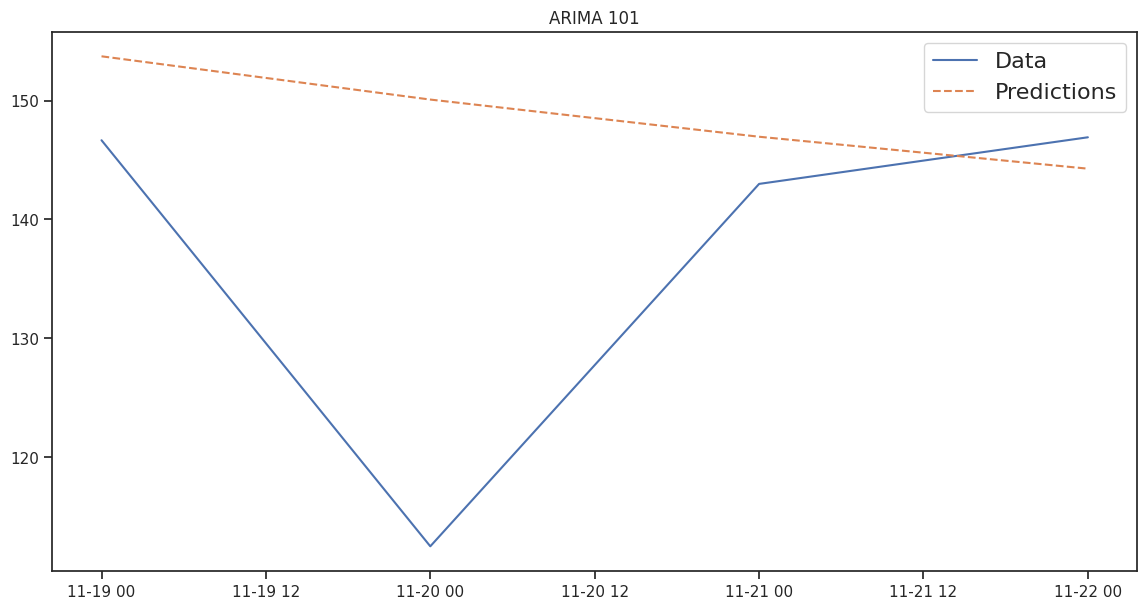

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

In [20]:
model_fit.aic 
model_fit.aicc

np.float64(11130.689354909879)

np.float64(11130.727559303385)

In [21]:
model_fit.bic

np.float64(11150.52314848307)

In [22]:
model_fit.params

const      127.874626
ar.L1        0.859184
ma.L1       -0.293917
sigma2    2285.162651
dtype: float64

In [23]:
model_fit.seasonalarparams
model_fit.seasonalmaparams

array([], dtype=float64)

array([], dtype=float64)

In [24]:
#rf to calculate aqi

In [49]:
alandur_daily_aqi_rf = alandur_daily_aqi_indexed.copy()

In [50]:
alandur_daily_aqi_rf 

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NH3 (µg/m³),SO2 (µg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),O Xylene (µg/m³),...,CO (µg/m³),BP (hPa),PM2.5_SubIndex,PM10_SubIndex,CO_SubIndex,Ozone_SubIndex,SO2_SubIndex,NOx_SubIndex,Checks,AQI
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01,21.202917,219.030000,4.236667,11.294583,2.620000,8.213750,8.452917,0.317917,0.188750,2.58,...,700.833333,1015.875310,35.338194,179.353333,35.041667,8.452917,10.267188,36.490604,6.0,179.353333
2021-01-02,19.524167,219.030000,4.227083,11.296250,2.620000,8.211667,5.055417,0.075417,0.111667,2.58,...,698.750000,1015.756987,32.540278,179.353333,34.937500,5.055417,10.264583,36.470042,6.0,179.353333
2021-01-03,15.239583,219.030000,4.232083,11.277917,2.620000,8.208333,6.836250,0.112917,0.246667,2.58,...,697.916667,1014.136569,25.399306,179.353333,34.895833,6.836250,10.260417,36.481792,6.0,179.353333
2021-01-04,14.137083,219.030000,4.223333,11.273750,2.620000,8.212917,8.474167,0.085833,0.197917,2.58,...,698.333333,1014.406546,23.561806,179.353333,34.916667,8.474167,10.266146,36.489625,6.0,179.353333
2021-01-05,7.807917,219.030000,4.221250,11.288333,2.620000,8.212500,1.830000,0.000000,0.215833,2.58,...,700.000000,1015.180369,13.013194,179.353333,35.000000,1.830000,10.265625,36.521937,6.0,179.353333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-16,22.876250,38.126250,2.221250,9.351250,24.196250,4.182083,5.855833,0.414583,1.200000,2.58,...,421.250000,1005.541188,38.127083,38.126250,21.062500,5.855833,5.227604,27.196354,6.0,38.270910
2024-10-17,56.269167,99.440417,3.559167,9.054167,23.175417,4.200000,7.989583,0.373333,1.200000,2.58,...,499.166667,1005.541188,105.636111,93.844167,24.958333,7.989583,5.250000,29.437667,6.0,106.943472
2024-10-18,55.230000,105.975417,5.345833,9.468333,24.035417,4.200000,7.879167,0.406250,1.200000,2.58,...,498.333333,1005.541188,96.077083,101.906111,24.916667,7.879167,5.250000,34.812312,6.0,103.400556


In [51]:
alandur_daily_aqi_rf.columns

Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NH3 (µg/m³)', 'SO2 (µg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)',
       'Toluene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
       'MP-Xylene (µg/m³)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'VWS (m/s)', 'station', 'hour', 'day', 'month', 'year', 'Wind Impact',
       'NOx (µg/m³)', 'CO (µg/m³)', 'BP (hPa)', 'PM2.5_SubIndex',
       'PM10_SubIndex', 'CO_SubIndex', 'Ozone_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'Checks', 'AQI'],
      dtype='object')

In [52]:
alandur_daily_aqi_rf = alandur_daily_aqi_rf[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (µg/m³)', 'CO (µg/m³)', 'Ozone (µg/m³)', 'AQI']]
alandur_daily_aqi_rf

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³),AQI
Timestamp,,,,,,,,
2021-01-01,21.202917,219.030000,4.236667,11.294583,29.192483,700.833333,8.452917,179.353333
2021-01-02,19.524167,219.030000,4.227083,11.296250,29.176033,698.750000,5.055417,179.353333
2021-01-03,15.239583,219.030000,4.232083,11.277917,29.185433,697.916667,6.836250,179.353333
2021-01-04,14.137083,219.030000,4.223333,11.273750,29.191700,698.333333,8.474167,179.353333
2021-01-05,7.807917,219.030000,4.221250,11.288333,29.217550,700.000000,1.830000,179.353333
...,...,...,...,...,...,...,...,...
2024-10-16,22.876250,38.126250,2.221250,9.351250,21.757083,421.250000,5.855833,38.270910
2024-10-17,56.269167,99.440417,3.559167,9.054167,23.550133,499.166667,7.989583,106.943472
2024-10-18,55.230000,105.975417,5.345833,9.468333,27.849850,498.333333,7.879167,103.400556


In [53]:
train_end = pd.Timestamp('2023-11-23')
test_end = pd.Timestamp('2023-12-01')

train_data = alandur_daily_aqi_rf[:train_end]
test_data = alandur_daily_aqi_rf[train_end + timedelta(days=1):test_end]

In [54]:

X_train_data = train_data.drop(['AQI'], axis=1)
y_train_data = train_data['AQI'].values

In [55]:
X_train_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³)
Timestamp,,,,,,,
2021-01-01,21.202917,219.030000,4.236667,11.294583,29.192483,700.833333,8.452917
2021-01-02,19.524167,219.030000,4.227083,11.296250,29.176033,698.750000,5.055417
2021-01-03,15.239583,219.030000,4.232083,11.277917,29.185433,697.916667,6.836250
2021-01-04,14.137083,219.030000,4.223333,11.273750,29.191700,698.333333,8.474167
2021-01-05,7.807917,219.030000,4.221250,11.288333,29.217550,700.000000,1.830000
...,...,...,...,...,...,...,...
2023-11-19,40.512778,60.862222,20.593889,48.468542,129.905389,904.027778,21.993125
2023-11-20,35.518681,54.867535,11.656701,38.017951,93.432344,901.701389,18.536528
2023-11-21,29.954757,48.194271,22.007639,43.660764,123.525531,900.868056,18.050174


In [56]:

y_train_data

array([179.35333333, 179.35333333, 179.35333333, ..., 142.98754826,
       146.91035278, 151.06787396], shape=(1057,))

In [57]:

test_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³),AQI
Timestamp,,,,,,,,
2023-11-24,35.378715,54.739931,24.389861,44.769167,130.098350,901.284722,17.866493,147.364041
2023-11-25,37.220486,56.913542,16.153819,46.684063,118.191096,901.180556,19.465764,137.439074
2023-11-26,38.339340,58.258160,24.764896,57.398056,154.477903,906.631944,23.607396,170.606080
2023-11-27,31.960764,50.603750,13.306701,39.871111,100.065546,900.381944,18.568924,118.337449
2023-11-28,45.343229,66.664861,5.829583,32.885382,72.853525,903.923611,18.421632,106.437528
2023-11-29,33.986389,53.033715,24.416632,49.896979,139.788053,902.187500,16.542257,159.221580
2023-11-30,30.311840,48.624097,18.496285,43.606771,116.842131,905.208333,17.538681,134.622626
2023-12-01,30.700104,49.095208,20.506076,55.253437,142.541861,903.611111,19.178194,159.685120


In [58]:

X_test_data = test_data.drop(['AQI'], axis=1)
y_test_data = test_data['AQI'].values

In [59]:

X_test_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³)
Timestamp,,,,,,,
2023-11-24,35.378715,54.739931,24.389861,44.769167,130.098350,901.284722,17.866493
2023-11-25,37.220486,56.913542,16.153819,46.684063,118.191096,901.180556,19.465764
2023-11-26,38.339340,58.258160,24.764896,57.398056,154.477903,906.631944,23.607396
2023-11-27,31.960764,50.603750,13.306701,39.871111,100.065546,900.381944,18.568924
2023-11-28,45.343229,66.664861,5.829583,32.885382,72.853525,903.923611,18.421632
2023-11-29,33.986389,53.033715,24.416632,49.896979,139.788053,902.187500,16.542257
2023-11-30,30.311840,48.624097,18.496285,43.606771,116.842131,905.208333,17.538681
2023-12-01,30.700104,49.095208,20.506076,55.253437,142.541861,903.611111,19.178194


In [60]:

y_test_data

array([147.36404063, 137.43907361, 170.60607951, 118.33744861,
       106.43752778, 159.22157951, 134.62262569, 159.68512049])

In [61]:

from sklearn.ensemble import RandomForestRegressor

In [62]:

rf = RandomForestRegressor()
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [63]:

rf.fit(X_train_data, y_train_data)

RandomForestRegressor()

In [64]:
pred = rf.predict(X_test_data)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Random forest model')

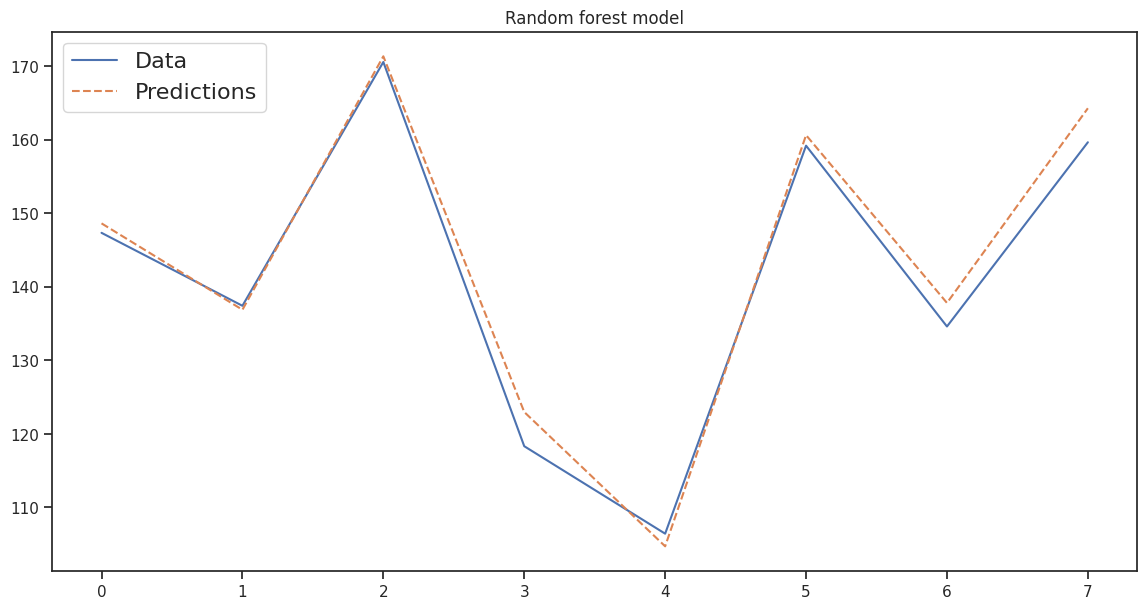

In [65]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_data)
plt.plot(pred, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("Random forest model")

In [66]:
#using Neural Network to calculate AQI